<a href="https://colab.research.google.com/github/KhaledZakarie/HandWritten-Grauation-Project/blob/main/Final_15_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**##Imports##**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

**##Read Image &  Resize##**

(677, 749, 3)
(677, 749, 3)


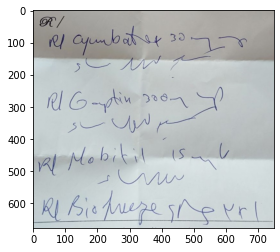

In [2]:
img = cv2.imread('/content/Cairo-500.jpg') #read image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #imageFile is read with imread(), the order of colors is BGR, On the other hand, in Pillow, the order of colors is GB 

h, w, c = img.shape #height, width, channels 
print(img.shape)
if w > 1000: # width must longer than 1000
    new_w = 1000
    ar = w/h #to get the new height
    new_h = int(new_w/ar)
    
    img = cv2.resize(img, (new_w, new_h), interpolation = cv2.INTER_AREA)
print(img.shape)
plt.imshow(img);

**##Threshold Function##**

In [3]:
def thresholding(image):
    img_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    #ret,thresh = cv2.threshold(img_gray, 120,255,cv2.THRESH_BINARY_INV)
    thresh = cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
    plt.imshow(thresh, cmap='gray')
    return thresh

**##Calling Threashold##**

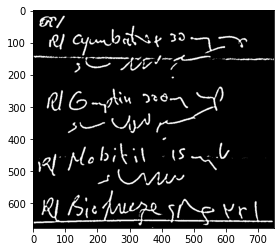

In [4]:
blurred = cv2.GaussianBlur(img.copy(), (17, 17), 0)
thresh_img = thresholding(blurred);

**##Line dilation##**

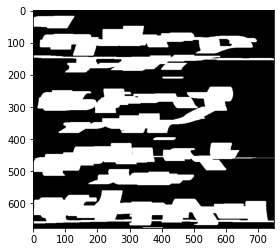

In [5]:
kernel = np.ones((1,60), np.uint8) #matrix of ones on shape 3*85 in dataType unsigned int 
#print(kernel)
dilated = cv2.dilate(thresh_img, kernel, iterations = 1) #iteration is num of steps of kernal
plt.imshow(dilated, cmap='gray');

**##Get Contours##**

In [6]:
(contours, heirarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
sorted_contours_lines = sorted(contours, key = lambda ctr : cv2.boundingRect(ctr)[1]) # (x, y, w, h) #1 mean sort vertically but 0 mean sort horizontally
print(sorted_contours_lines[0].shape)

(298, 1, 2)


**##Mean Hight Of Lines##**

In [7]:
#img2 = img.copy()
sum_of_heights = 0
#sorted_contours_lines_2 = []
for ctr in sorted_contours_lines:
    x,y,w,h = cv2.boundingRect(ctr)  
    sum_of_heights += h 
mean_of_heights = sum_of_heights/len(sorted_contours_lines)

**##Mean Space Between Lines##**

In [8]:
sum_of_spaces = 0
i=1
for ctr in sorted_contours_lines:
  if(i < len(sorted_contours_lines)):
    x,y,w,h = cv2.boundingRect(ctr)
    nx,ny,nw,nh = cv2.boundingRect(sorted_contours_lines[i])
    #sum_of_spaces += (y-(ny+nh))
    sum_of_spaces += (ny - (y+h))
    i +=1
mean_of_spaces = sum_of_spaces / (len(sorted_contours_lines)-1)

**##h = Mean_h##**

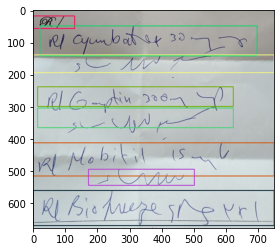

In [12]:
img4 = img.copy()

for ctr in sorted_contours_lines:
    #ctr= sorted_contours_lines[4]
    x,y,w,h = cv2.boundingRect(ctr)
    if(h < int(mean_of_heights/2)):
        continue
    if(h > int(2 * mean_of_heights)):
        h=int(mean_of_heights)
        ny= (y+h) + int(mean_of_spaces)
        #print(f"y {y} h {y+h} ny {ny}")
        cv2.rectangle(img4, (x,ny), (x+w, ny+h), (np.random.randint(255),np.random.randint(255),np.random.randint(255)), 2) #img, coordnate, area, color, bold

    cv2.rectangle(img4, (x,y), (x+w, y+h), (np.random.randint(255),np.random.randint(255),np.random.randint(255)), 2) #img, coordnate, area, color, bold
    #print(f"h {h} mean {mean_of_spaces}")
plt.imshow(img4);

**##h= h\2##**

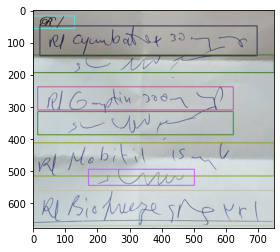

In [10]:
img3 = img.copy()

for ctr in sorted_contours_lines:
    #ctr= sorted_contours_lines[4]
    x,y,w,h = cv2.boundingRect(ctr)
    if(h < int(mean_of_heights/2)):
        continue
    if(h > int(2 * mean_of_heights)):
        h=int(h/2)
        ny= (y+h) + int(mean_of_spaces)
        #print(f"y {y} h {y+h} ny {ny}")
        cv2.rectangle(img3, (x,ny), (x+w, ny+h), (np.random.randint(255),np.random.randint(255),np.random.randint(255)), 2) #img, coordnate, area, color, bold

    cv2.rectangle(img3, (x,y), (x+w, y+h), (np.random.randint(255),np.random.randint(255),np.random.randint(255)), 2) #img, coordnate, area, color, bold
    #print(f"h {h} mean {mean_of_spaces}")
plt.imshow(img3);

**##Line Segmentation##**

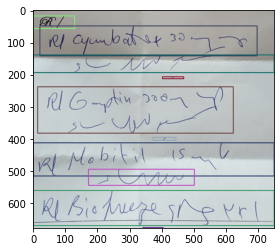

In [11]:
img2 = img.copy()

for ctr in sorted_contours_lines:
    
    x,y,w,h = cv2.boundingRect(ctr)
    
    cv2.rectangle(img2, (x,y), (x+w, y+h), (np.random.randint(255),np.random.randint(255),np.random.randint(255)), 2) #img, coordnate, area, color, bold
    #print(h)
plt.imshow(img2);

**##Print Line##**

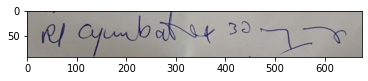

In [ ]:
img3 = img.copy()  
x,y,w,h = cv2.boundingRect(sorted_contours_lines[1])
plt.imshow(img3[y:y+h, x:x+w])

**##Crop Lines##**

In [ ]:
crop_img = img.copy()
i=0
for ctr in sorted_contours_lines:
    x,y,w,h = cv2.boundingRect(ctr)
    line = crop_img[y:h+y, x:w+x]
    print(str(x) + " " + str(y) +" "+str(w) +" "+str(h))
    cv2.imwrite(f"/content/Lines/Line_{i}.jpg", line)
    i+=1


0 18 129 39
21 49 675 93
0 139 749 55
402 207 66 6
14 238 608 144
373 395 71 9
0 412 749 103
172 494 329 50
0 560 749 109
341 675 63 2


**##Word dilation##**

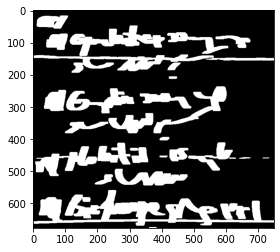

In [ ]:
kernel = np.ones((3,20), np.uint8)
dilated2 = cv2.dilate(thresh_img, kernel, iterations = 1)
plt.imshow(dilated2, cmap='gray');

**##Word Segmentation##**

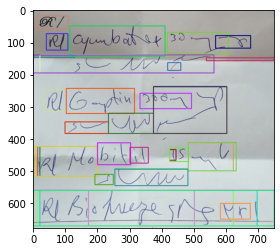

In [ ]:
img3 = img.copy()
words_list = []

for line in sorted_contours_lines:
    
    # roi of each line
    x, y, w, h = cv2.boundingRect(line)
    roi_line = dilated2[y:y+w, x:x+w]
    #plt.imshow(roi_line);
    # draw contours on each word
    (cnt, heirarchy) = cv2.findContours(roi_line.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    sorted_contour_words = sorted(cnt, key=lambda cntr : cv2.boundingRect(cntr)[0])#0 mean sort horizontally but 1 mean sort vertically  
    
    for word in sorted_contour_words:
        #print(cv2.contourArea(word))
        if cv2.contourArea(word) < 400:
            continue
        
        x2, y2, w2, h2 = cv2.boundingRect(word)
        words_list.append([x+x2, y+y2, x+x2+w2, y+y2+h2])
        cv2.rectangle(img3, (x+x2, y+y2), (x+x2+w2, y+y2+h2), (np.random.randint(255),np.random.randint(255),np.random.randint(255)),2)
        
plt.imshow(img3);

**##Print Word##**

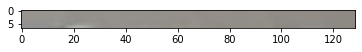

In [ ]:
word = words_list[0]
word_img = img[word[1]:word[3], word[0]:word[2]]
plt.imshow(word_img);

**##Download Folder##**

In [ ]:
!zip -r /content/Lines.zip /content/Lines/ #path+name  #path⅖